{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'ID': 259, 'type': 'NATIVE', 'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'venue': 'Scientific Reports', 'year': 2021, 'journal': None, '

C:\Users\hjail\AppData\Local\Temp\ipykernel_15592\4198036032.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = encoder.fit_transform(X[column])
C:\Users\hjail\AppData\Local\Temp\ipykernel_15592\4198036032.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = encoder.fit_transform(X[column])
C:\Users\hjail\AppData\Local\Temp\ipykernel_15592\4198036032.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

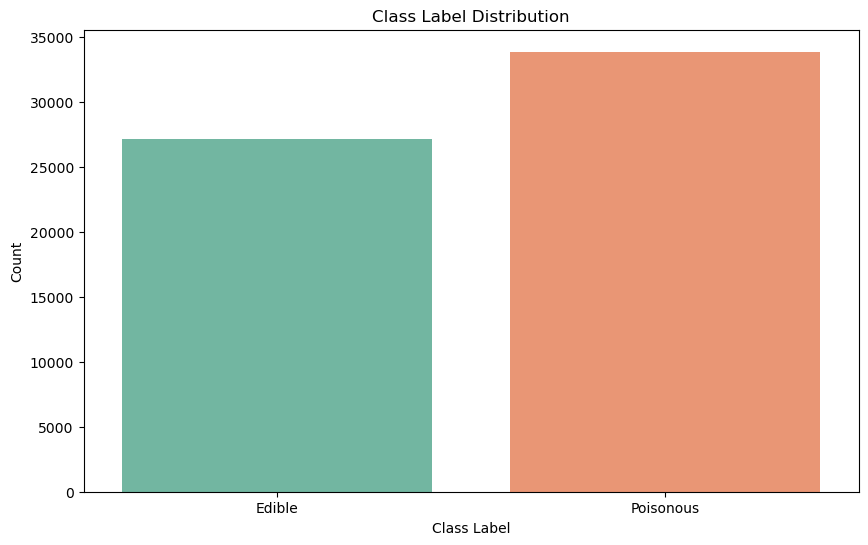

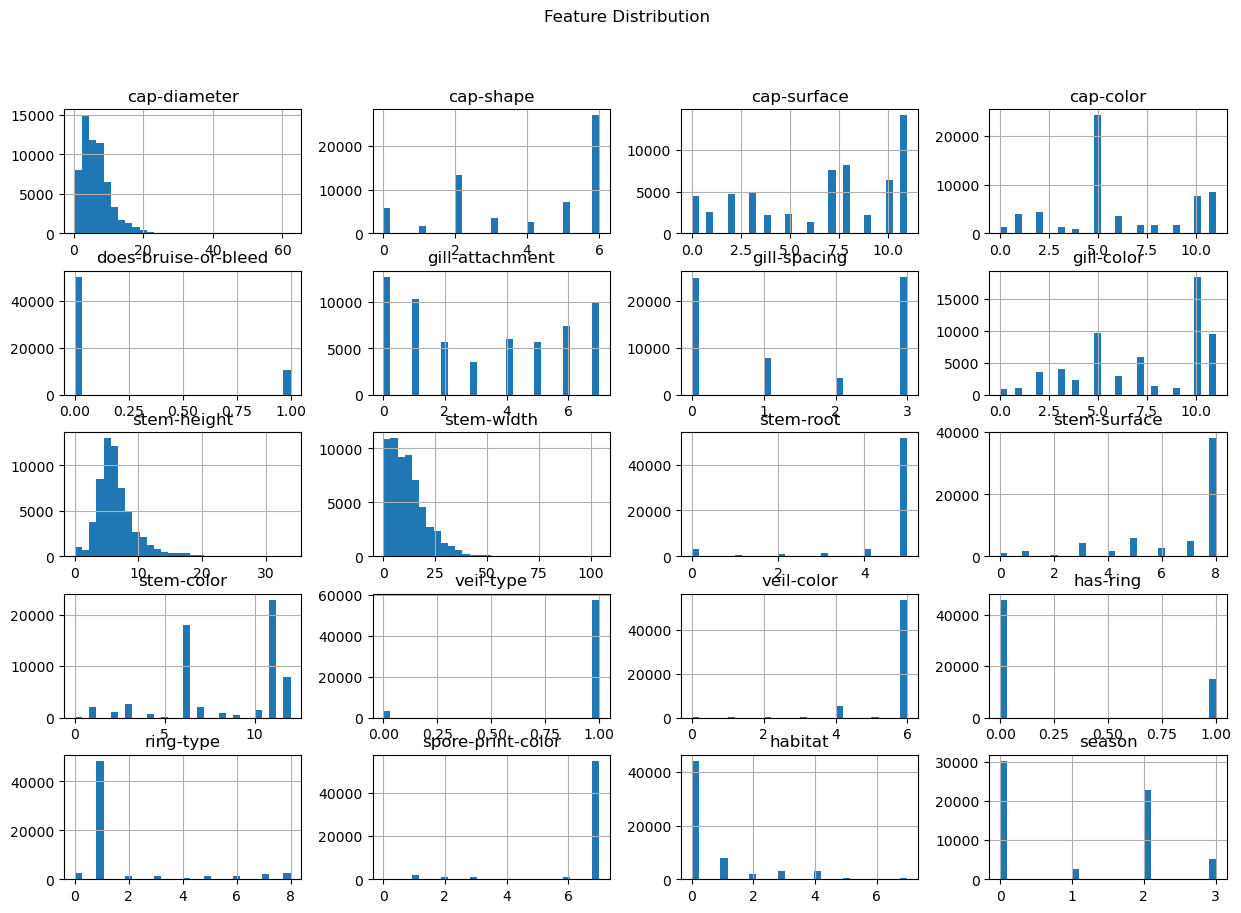

In [5]:
# Import the package
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Fetch dataset using its ID in the website 
secondary_mushroom = fetch_ucirepo(id=848)

# Extract features and targets
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# Display metadata
print(secondary_mushroom.metadata)


# Encoding target variable (if necessary)
encoder = LabelEncoder()

# Apply LabelEncoder to each column in your dataset (if categorical)
for column in X.columns:  # Assuming X is your feature set
    if X[column].dtype == 'object':  # Check if the column is categorical
        X[column] = encoder.fit_transform(X[column])

# Similarly, encode the target variable
y_encoded = encoder.fit_transform(y)

# Add target labels to dataset for visualization
X_with_target = X.copy()
X_with_target['Class Label'] = y_encoded

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


# Build and train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Test Result 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize class label distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Class Label', data=X_with_target, palette="Set2")
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

import matplotlib.pyplot as plt
X.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distribution")
plt.show()